<a href="https://colab.research.google.com/github/DrDourado/Teaching_ME_615/blob/main/ME_615_10_Clustering_and_the_K_Means_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This notebook provides a basic understanding of the k-means clustering algorithm and demonstrates how it can be applied to cluster a sample dataset. It also highlights the concept of centroids, which represent the centers of the clusters.
 K-means is an unsupervised machine learning algorithm used for clustering analysis. It partitions a given dataset into k clusters based on the similarity of data points. The objective of k-means is to minimize the variance within clusters and maximize the variance between clusters.

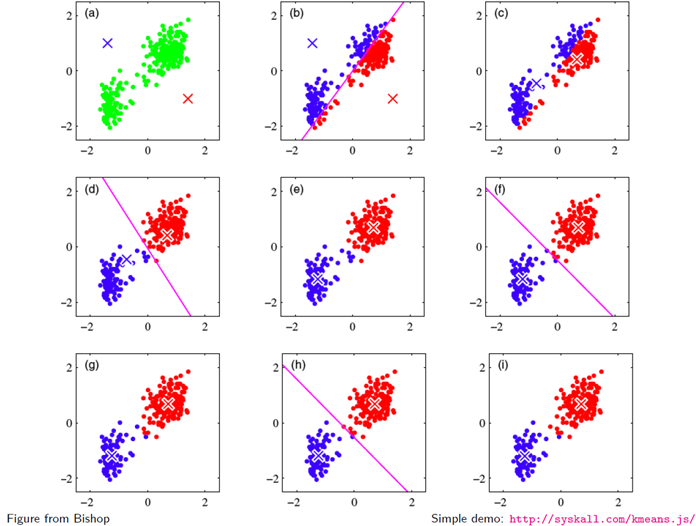

**How does it work?**
1. **Initialization**: K-means starts by randomly initializing k cluster centroids. These centroids represent the centers of the clusters.

2. **Assignment Step**: Each data point is assigned to the nearest centroid based on a distance metric, commonly the Euclidean distance. This step creates k clusters.

3. **Update Step**: After all data points have been assigned to clusters, the centroids are recalculated as the mean of all data points belonging to each cluster. This step updates the centroids' positions.

4. **Convergence**: Steps 2 and 3 are repeated iteratively until convergence, i.e., when the centroids no longer change significantly or a maximum number of iterations is reached.

**Key Concepts and Terms:**
- **Centroids**: Centroids are the representative points of each cluster. They are updated in each iteration to minimize the distance between data points within the same cluster.
- **Clusters**: Clusters are groups of data points that are similar to each other and dissimilar to data points in other clusters.
- **Inertia**: Inertia, also known as within-cluster sum of squares, is the sum of squared distances of each data point to its nearest centroid. It is used as a measure of how tightly grouped the data points are within clusters.

**What is K-means Used For?**
1. **Clustering**: K-means is primarily used for clustering analysis, where the goal is to group similar data points together based on their features or attributes.
2. **Data Preprocessing**: K-means can be used as a preprocessing step for other machine learning algorithms. It can help in reducing the dimensionality of the data and identifying meaningful patterns.
3. **Segmentation**: K-means is widely used in market segmentation, customer segmentation, and image segmentation to divide a dataset into distinct groups for further analysis or decision-making.
4. **Anomaly Detection**: K-means can be used for anomaly detection by identifying data points that do not belong to any cluster or are far from the centroids.

**Key Considerations:**
- **Number of Clusters (k)**: The choice of the number of clusters (k) is crucial and often determined using domain knowledge, the elbow method, or silhouette analysis.
- **Initialization**: K-means can be sensitive to the initial placement of centroids, leading to different final cluster assignments. Multiple initializations with random centroids are often used to mitigate this issue.
- **Scalability**: K-means can efficiently handle large datasets, but it may struggle with clusters of varying sizes and non-linearly separable data.

In summary, k-means is a popular clustering algorithm used for data analysis, segmentation, and pattern recognition. It is an effective and efficient method for discovering underlying structures within datasets and has applications across various domains including data mining, image processing, and customer analytics.

In this notebook you'll find steps illustrating the main aspects of the K-Means algorithm:

1. **Generating Sample Dataset**: We generate a sample dataset using the `make_blobs` function from scikit-learn

2. **Defining a Range of k Values**: We define a range of values for the number of clusters (k) that we want to explore.

3. **Iterating over Different Values of k**: We iterate over each value of k and perform k-means clustering. For each value of k, we calculate and store the inertia (sum of squared distances to the nearest centroid).

4. **Visualizing the Elbow Method**: We plot the inertia values against the number of clusters (k) to visualize the "elbow" in the curve. The elbow point represents an optimal value of k where adding more clusters does not significantly reduce the inertia.

5. **Visualizing the Clustered Data for the Best k**: We choose the best value of k based on the elbow method and visualize the clustered data using a scatter plot. Each point is colored according to its assigned cluster, and the centroids of the clusters are marked with red crosses.

This simplified example demonstrates how to use the elbow method to select an optimal value of k for the k-means algorithm and visualize the impact of different values of k on the clustering performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
# Generate sample dataset
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.70, random_state=0)

In [3]:
# Define a range of values for k
k_values = range(1, 11)

In [4]:
# Initialize an empty list to store the inertia (sum of squared distances to the nearest centroid) for each value of k
inertia_values = []

# Iterate over different values of k
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)

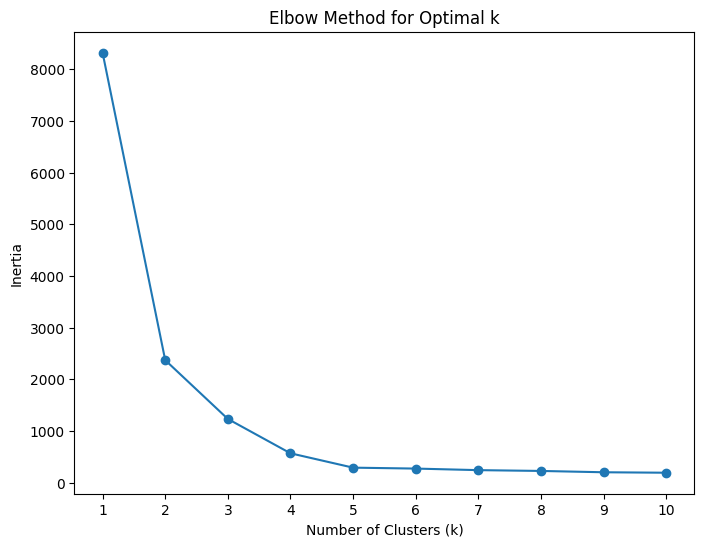

In [5]:
# Visualize the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

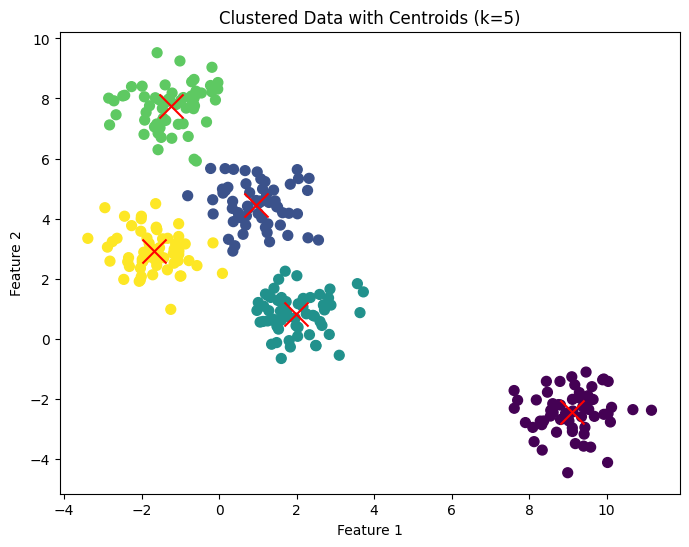

In [6]:
# Visualize the clustered data for the best k
best_k = 5  # You can choose the best k based on the elbow method or domain knowledge
kmeans_best = KMeans(n_clusters=best_k)
kmeans_best.fit(X)

# Visualize the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_best.labels_, cmap='viridis', s=50)
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1], marker='x', s=300, c='red')
plt.title('Clustered Data with Centroids (k={})'.format(best_k))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()